# Data Management Group Project 4 - City Service Requests in 2017

##### Group memebers: Jiaying Shi, Jingze Zhang, Qiao Zhang, Parisa Mofakham

### Part 1 - Selection
Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome.

##### Q1.1 Choose Your dataset 

The dataset that we chose is "Washington D.C service requests in 2017". The data is generated by DC 311 request center and consists of all request types such as waste management, parking enforcement, transportation operations, etc. The requests are placed via electronic, mail or other means of communication.

data source:http://opendata.dc.gov/datasets/city-service-requests-in-2017/data

###### Reason
Our group is very interested in the topic of how Washington D.C. local government fulfill their duties and service their residents; the dataset City Service Requests in 2017 is very suitable for this topic because it stores the newest updated information, records information in detail, and is closely related to our daily lives.

###### About Themes
This dataset provides the time and date on which each city service request is placed, the time and date each request is due, and time and date each request is resolved. This information developed curiosity among our team members to figure out how long it takes for each request to be resolved once it is received by the center. What portion of the requests are taken care of when past due? Is there any relationship between the type of the request and the duration of the resolution process? Can each involved department fulfill the job responsibly?


###### Difficulties and Challenges
This dataset records the information of submitted request in detail, however, due to the lack of official explanation, some of the columns have ambiguous meanings. Thus, we need to make effort to search for information and understand our dataset first.

Moreover, there are some columns with duplicable information, some columns with null values and some columns with messy date values. For example, in the raw data, all the columns of date type have letter ‘T’ between day and hour. Thus, we need to clean the data before we start to analyze it.

Furthermore, the text structure of some columns with string value is very complicated. As we choose to use python pandas to clean part of our messy data and to make some transform, this complex text structure leads to issues when we export and store the data frame into a new csv file. For example, in SERVICECODEDESCRIPTION column there is a value going on “DMV- Forms, Applications, and Manuals Request’. When we load the data into RDD, this value is separated into three columns causing a new round of messy data.

Last but not least, due to our analysis objective, we need to transform the raw data of date into time duration in order to get more straightforward and more intuitional information. To make the duration time as accurate as possible, we choose to use the smallest time increment, which is “second”. Therefore, we can analyze things such as mission completion time and overdue time of each submitted request. This would be a challengeable work for us.



##### Q1.2 Get your data

Use wget to download the data into our instance.

In [1]:
!wget -O City_Service_Requests_in_2017.csv https://s3.amazonaws.com/datamangement/City_Service_Requests_in_2017.csv

--2017-12-08 06:02:53--  https://s3.amazonaws.com/datamangement/City_Service_Requests_in_2017.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.227.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.227.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110681923 (106M) [text/csv]
Saving to: ‘City_Service_Requests_in_2017.csv’

City_Service_Reques 100%[===================>] 105.55M  95.2MB/s    in 1.1s    

2017-12-08 06:02:54 (95.2 MB/s) - ‘City_Service_Requests_in_2017.csv’ saved [110681923/110681923]



##### Q1.3 Explore your data

We changed the name of our dataset from City_Service_Requests_in_2017.csv to ql.csv for the ease of operations.


In [2]:
!mv City_Service_Requests_in_2017.csv q1.csv

Lets look at the columns in our dataset to identify the variables included in our dataset.



In [3]:
!xsv headers q1.csv

1   X
2   Y
3   OBJECTID
4   SERVICECODE
5   SERVICECODEDESCRIPTION
6   SERVICETYPECODEDESCRIPTION
7   ORGANIZATIONACRONYM
8   SERVICECALLCOUNT
9   ADDDATE
10  RESOLUTIONDATE
11  SERVICEDUEDATE
12  SERVICEORDERDATE
13  INSPECTIONFLAG
14  INSPECTIONDATE
15  INSPECTORNAME
16  SERVICEORDERSTATUS
17  STATUS_CODE
18  SERVICEREQUESTID
19  PRIORITY
20  STREETADDRESS
21  XCOORD
22  YCOORD
23  LATITUDE
24  LONGITUDE
25  CITY
26  STATE
27  ZIPCODE
28  MARADDRESSREPOSITORYID
29  WARD
30  DETAILS


Here is what each variable means:
1. X: Longitude of the location for which the request was submitted.
2. Y: Latitude of the location for which the request was submitted.
These two numeric variables are beneficial in detecting the geographic location of the locations for which a service request is submitted.
3. OBJECTID: A unique identifier of the submitted request. OBJECTID is an integer type variable that can be used to find each specific request.
4. SERVICECODE: A unique identifier of each service type. This is a character type (can be both numbers and letters) variable which can be useful in identifying the type of the service that was requested.
5. SERVICECODEDISCRIPTION: A description of what each service code represents. This is a string type variable that can be helpful for users to identify service types (relevantly detailed) by glancing at the dataset without referring to service type dataset.
6. SERVICETYPECODEDESCRIPTION: This provides a brief description of what the request is regarding in a more general way. Essentially, this string type variables indicates which departments will be most likely responsible for resolving the situation.
7. ORGANIZATIONACRONYM: Provides an abbreviated name for the organization in charge for resolving the situation. This string type variable is useful to identify the organizations to which a request is related.
8. SERVICECALLCOUNT: An integer type variable which refers to the number of calls the center received for each request.
9. ADDDATE: The date and time in which the request was added to the system. Typically, this date type variable is the same as service order date because the service requests are supposed to be entered to the system immediately.
10. RESOLUTIONDATE: This date type variable denotes the date on which each service request is resolved.
11. SERVICEDUEDATE: A due date (date type) is designated to each service request and corresponding departments are responsible for resolving the service request no later than the due date.
12. SERVICEORDERDATE: This date type variable denotes the dates on which each service requests are placed.
13. INSPECTIONFLAG: Depending on the nature of the service requested, some of the requests might necessitate an inspection. This Boolean variable denotes if an inspection is needed or not.
14. INSPECTIONDATE: This date type variable denotes the date on which the inspection occurred.
15. INSPECTORNAME: This string type variable shows the name of the person who was sent for inspection to each location that the requested service needed inspection.
16. SERVICEORDERSTATUS: Denotes the status of the order of the submitted request. A string type variable which can be used to identify the service requests that are not resolved yet.
17. STATUSCODE: A Boolean type variable which shows the status of a service, whether a request was resolved or is still open. This variable is almost the same as Service order status. The only difference is that status code does not provide any further information than open or close status. 
18. SERVICEREQUESTID: A unique identifier for each service request. This number has the format of 17-xxxxxxxx. 
19. PRIORITY: The priority level of the submitted request, most of which are standard.
20. STREETADDRESS: Denotes the address of the location for which a service request is submitted. 
21. XCOORD*: Longitude of the location for which the request was submitted.
22. YCOORD*: Latitude of the location for which the request was submitted.
23. LATITUDE*: Latitude of the location for which the request was submitted.
24. LONGITUDE*: Longitude of the location for which the request was submitted.
 *Refer to explanations for number 1 and 2 variables.

25. CITY: This string type variable denotes the city where the request was submitted for.
26. STATE: This string type variable provides an abbreviated name of the state for which the request was submitted.
27. ZIPCODE: Denotes the zip code of the location for which the request was submitted. This variable can be useful for detecting an approximate address of the location for which a request is submitted.
28. MARADDRESSREPOSITORYID: MAR is a database used by the government for building addresses. This numeric variable facilitates the comparing and relating information with locations across databases and agencies for District government. 
29. WARD: Ward in DC an indicator of the neighborhood. There are 8 wards in DC that contain names of 131 neighborhood. Each neighborhood is assigned to a ward. This numeric variable contains the ward number (1,2,3,4,5,6,7or 8) and is useful in identifying which neighborhoods are potentially affected by the problem for which a service request is submitted. 
30. DETAILS: This is a string type variable which provides additional information regarding the submitted request.


Getting more familiar with our dataset, let’s look at how many service requests exist in our dataset.


In [4]:
!xsv count q1.csv

279513


Let’s take a look at our dataset.


In [5]:
!head q1.csv | xsv table

X                    Y                   OBJECTID  SERVICECODE  SERVICECODEDESCRIPTION                    SERVICETYPECODEDESCRIPTION                           ORGANIZATIONACRONYM  SERVICECALLCOUNT  ADDDATE                   RESOLUTIONDATE            SERVICEDUEDATE            SERVICEORDERDATE          INSPECTIONFLAG  INSPECTIONDATE            INSPECTORNAME  SERVICEORDERSTATUS  STATUS_CODE  SERVICEREQUESTID  PRIORITY  STREETADDRESS                            XCOORD           YCOORD           LATITUDE          LONGITUDE          CITY        STATE  ZIPCODE  MARADDRESSREPOSITORYID  WARD  DETAILS
-77.021153859086283  38.95749123523553   1455968   S0441        Trash Collection - Missed                 SWMA- Solid Waste Management Admistration            DPW                  1                 2017-01-06T11:05:01.000Z  2017-01-07T15:33:13.000Z  2017-01-10T11:05:00.000Z  2017-01-06T11:05:01.000Z  N                                                        CLOSED              CLOSED       17-0000442

We realized that there are some columns that are essentially providing the same information. Consequently, keeping these all of these columns is redundant and does not provide any additional information. Therefore, we decided to delete the columns which contained duplicate information.


For instance, the six columns below are all about location, we decided to only keep columns LATITUDE and LONGITUDE when conducting our analysis.


In [6]:
!xsv select 1,2,21,22,23,24 q1.csv | head | xsv table

X                    Y                   XCOORD           YCOORD           LATITUDE          LONGITUDE
-77.021153859086283  38.95749123523553   398166.71        143286.67        38.957483436305   -77.0211515654456
-77.004207037113702  38.961836495728257  399635.58        143768.83        38.96182903       -77.00420475
-77.021153859086283  38.95749123523553   398166.71        143286.67        38.957483436305   -77.0211515654456
-77.017597586650453  38.916086529304607  398474.06        138690.32        38.91607907       -77.0175953
-77.012467064514311  38.971428608442508  398919.84        144833.71        38.97142114       -77.01246477
-76.99208909100696   38.886042008939761  400686.55500659  135355.01996304  38.8860342229946  -76.9920868107094
-76.993992063270483  38.898579795135902  400521.36        136746.8         38.89857234       -76.99398978
-77.009720447730317  38.910230138208981  399157.13        138040.11        38.91022268       -77.00971816
-76.99724362787957   38.89594082652

Also, the two columns below both indicate the service type. We decided to delete the SERVICECODE and only keep the SERVICECODEDESCRIPTION because SERVICECODEDESCRIPTION provides the user a more comprehensive understanding of what the service type is.


In [7]:
!xsv select 4,5 q1.csv | head | xsv table

SERVICECODE  SERVICECODEDESCRIPTION
S0441        Trash Collection - Missed
S0441        Trash Collection - Missed
S0321        Recycling Collection - Missed
SIDEWLKEXP   Sidewalk Shoveling Enforcement Exemption
S0441        Trash Collection - Missed
S0261        Parking Enforcement
SIGNMISS     Roadway Signs
S0441        Trash Collection - Missed
SIDEWLKEXP   Sidewalk Shoveling Enforcement Exemption


In [8]:
!xsv stats q1.csv

field,type,sum,min,max,min_length,max_length,mean,stddev
X,Float,-21526231.531430632,-77.11420866788129,-76.90976021196978,12,19,-77.0133465399844,0.03793743457547684
Y,Float,10876532.932653144,38.81274625214149,38.994978859628894,11,18,38.91244032532807,0.03133954691153366
OBJECTID,Integer,459648468750,1455968,1817067,7,7,1644461.863133404,96634.132756805
SERVICECODE,Unicode,,11,WNTRHYPO,2,11,,
SERVICECODEDESCRIPTION,Unicode,,311Force Reported Issues,Yard Waste - Missed,7,52,,
SERVICETYPECODEDESCRIPTION,Unicode,,311- Call Center,Urban Forrestry,4,51,,
ORGANIZATIONACRONYM,Unicode,,DC-ICH,Serve DC,3,8,,
SERVICECALLCOUNT,Integer,279513,1,1,1,1,1,0
ADDDATE,Unicode,,2017-01-01T00:46:55.000Z,2017-11-21T08:55:58.000Z,24,24,,
RESOLUTIONDATE,Unicode,,2017-01-01T08:10:48.000Z,2017-11-21T08:58:16.000Z,0,24,,
SERVICEDUEDATE,Unicode,,2017-01-02T13:20:26.000Z,2020-08-14T14:45:00.000Z,0,24,,
SERVICEORDERDATE,Unicode,,2017-01-01T00:46:55.000Z,2017-11-21T08:55:58.000Z,24,24,,
INSPECTIONFLAG,Unicode,,N

From the above statistical analysis, we found that there is a column (SERVICECALLCOUNT) that only contains value of 1. We decided to keep the SERVICECALLCOUNT to calculate how many requests from different zip codes were received.

In [9]:
!xsv select 8,15 q1.csv | head | xsv table

SERVICECALLCOUNT  INSPECTORNAME
1                 
1                 
1                 
1                 
1                 
1                 
1                 
1                 
1                 


INSPECTORNAME has no value so we decided to delete this column.


MARADDRESSREPOSITORY also provides information on the location for which a service request was submitted. In regard to the analysis we are going to conduct, we found the information in this column redundant. Furthermore, looking at the Details column, we came to the realization that the information in this column is not related to our analysis. Therefore, we decided to delete these two columns.


In [10]:
!xsv select 28,30 q1.csv | head | xsv table

MARADDRESSREPOSITORYID  DETAILS
810008                  Collected by Hinkle and crew on 1/7/2017
51018                   Collected by Hinkle and crew on 1/7/2017
810008                  Collected by G. Hinkle and crew on 1//7/2017
229801                  Thank you for applying for the 2016/2017 Sidewalk Shoveling Exemption Program; However further documentation is needed. Please contact Ms. Amy Carter on (202) 645-7190.
245253                  collected by g. hinkle closed out by sdg
800838                  
1498                    There+are+similar+service+requests+in+this+block.+SYEP
236859                  collected by g. hinkle closed out by sdg
2607                    Thank you for applying for the 2016/2017 Sidewalk Shoveling Exemption Program with the Department of Public Works. Application approved. Letters will be mailed soon.


### Part 2 - Wrangling
Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

We found Trifacta as a very useful software for wrangling our data. We changed the format of all our dates. There was a letter ‘T’ separating dates and time in each cell. This format appeared to be problematic in calculating the duration of each service resolution. Therefore, we changed the format in these cells and omitted the ‘T’. Using Trifacta, we also deleted the columns which we decided on deleting in the previous section.


Because Trifacta only can handle data file size that is less than 100 MB, so we divided our data into two parts. The first part is the number of records before 200001. And the second part is the number of records after 200000. Then we make these two new clean data into one data. 

###### Below please find the recipe that we used to conduct wrangling our data.


```
drop col: X
drop col: Y
drop col: SERVICECODE
set col: ADDDATE value: dateformat($col, 'yyyy-MM-dd HH:mm:ss.SSS')
set col: RESOLUTIONDATE value: dateformat($col, 'yyyy-MM-dd HH:mm:ss.SSS')
set col: SERVICEDUEDATE value: dateformat($col, 'yyyy-MM-dd HH:mm:ss.SSS')
set col: SERVICEORDERDATE value: dateformat($col, 'yyyy-MM-dd HH:mm:ss.SSS')
set col: INSPECTIONDATE value: dateformat($col, 'yyyy-MM-dd HH:mm:ss.SSS')
drop col: INSPECTORNAME
drop col: STREETADDRESS
drop col: XCOORD
drop col: YCOORD
drop col: CITY
drop col: STATE
drop col: MARADDRESSREPOSITORYID
drop col: DETAILS
```

It is the time upload our clean and wrangled data into our notebook and see how it looks.


In [11]:
! wget -O City_Service_Requests_in_2017_clean.csv https://s3.amazonaws.com/datamangement/City_Service_Requests_in_2017_clean.csv

--2017-12-08 06:02:58--  https://s3.amazonaws.com/datamangement/City_Service_Requests_in_2017_clean.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.98.171
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.98.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63315152 (60M) [text/csv]
Saving to: ‘City_Service_Requests_in_2017_clean.csv’

City_Service_Reques 100%[===================>]  60.38M  85.6MB/s    in 0.7s    

2017-12-08 06:02:59 (85.6 MB/s) - ‘City_Service_Requests_in_2017_clean.csv’ saved [63315152/63315152]



Here we change the name of our dataset again. So, we name our clean and wrangled dataset as q2.csv using the code below.


In [12]:
!mv City_Service_Requests_in_2017_clean.csv q2.csv

To make sure we have the right variables or columns, let’s take a look at the header of our q2.csv.


In [13]:
!xsv headers q2.csv

1   OBJECTID
2   SERVICECODEDESCRIPTION
3   SERVICETYPECODEDESCRIPTION
4   ORGANIZATIONACRONYM
5   SERVICECALLCOUNT
6   ADDDATE
7   RESOLUTIONDATE
8   SERVICEDUEDATE
9   SERVICEORDERDATE
10  INSPECTIONFLAG
11  INSPECTIONDATE
12  SERVICEORDERSTATUS
13  STATUS_CODE
14  SERVICEREQUESTID
15  PRIORITY
16  LATITUDE
17  LONGITUDE
18  ZIPCODE
19  WARD


We need to make sure that all of our data is transferred and uploaded successfully. So, we check the number of service requests to make sure we didn’t lose any data.


In [14]:
!xsv count q2.csv

279513


Looking at the new data, it seems cleaner and more efficient for our analysis.



In [15]:
!head q2.csv | xsv table

OBJECTID  SERVICECODEDESCRIPTION                    SERVICETYPECODEDESCRIPTION                           ORGANIZATIONACRONYM  SERVICECALLCOUNT  ADDDATE              RESOLUTIONDATE       SERVICEDUEDATE       SERVICEORDERDATE     INSPECTIONFLAG  INSPECTIONDATE       SERVICEORDERSTATUS  STATUS_CODE  SERVICEREQUESTID  PRIORITY  LATITUDE     LONGITUDE     ZIPCODE  WARD
1455968   Trash Collection - Missed                 SWMA- Solid Waste Management Admistration            DPW                  1                 2017-01-06 11:05:01  2017-01-07 15:33:13  2017-01-10 11:05:00  2017-01-06 11:05:01  N                                    CLOSED              CLOSED       17-00004426       STANDARD  38.95748344  -77.02115157  20011    4
1455969   Trash Collection - Missed                 SWMA- Solid Waste Management Admistration            DPW                  1                 2017-01-06 11:06:37  2017-01-07 15:33:15  2017-01-10 11:06:00  2017-01-06 11:06:37  N                                    CLOS

Also, we are going to compare our date columns in original data(q1.csv) and the wrangled data(q2.csv) to make sure that the changes have been implemented as intended.


In [16]:
!xsv select 3,9,10,11,12 q1.csv | head | xsv table

OBJECTID  ADDDATE                   RESOLUTIONDATE            SERVICEDUEDATE            SERVICEORDERDATE
1455968   2017-01-06T11:05:01.000Z  2017-01-07T15:33:13.000Z  2017-01-10T11:05:00.000Z  2017-01-06T11:05:01.000Z
1455969   2017-01-06T11:06:37.000Z  2017-01-07T15:33:15.000Z  2017-01-10T11:06:00.000Z  2017-01-06T11:06:37.000Z
1455970   2017-01-06T11:07:02.000Z  2017-01-07T16:13:13.000Z  2017-01-10T11:07:00.000Z  2017-01-06T11:07:02.000Z
1456001   2017-01-05T17:42:27.000Z  2017-04-19T11:22:27.000Z  2017-01-10T17:42:00.000Z  2017-01-05T17:42:27.000Z
1456002   2017-01-05T16:41:50.000Z  2017-01-07T10:08:04.000Z  2017-01-09T16:41:00.000Z  2017-01-05T16:41:50.000Z
1456003   2017-01-05T16:43:01.000Z  2017-01-05T17:11:37.000Z  2017-01-06T16:43:00.000Z  2017-01-05T16:43:01.000Z
1456004   2017-01-05T17:40:14.000Z                            2017-07-14T16:40:00.000Z  2017-01-05T17:40:14.000Z
1456005   2017-01-05T16:44:30.000Z  2017-01-07T10:13:19.000Z  2017-01-09T16:44:00.000Z  2017-01-05T16:44

In [17]:
!xsv select 1,6,7,8,9 q2.csv | head | xsv table

OBJECTID  ADDDATE              RESOLUTIONDATE       SERVICEDUEDATE       SERVICEORDERDATE
1455968   2017-01-06 11:05:01  2017-01-07 15:33:13  2017-01-10 11:05:00  2017-01-06 11:05:01
1455969   2017-01-06 11:06:37  2017-01-07 15:33:15  2017-01-10 11:06:00  2017-01-06 11:06:37
1455970   2017-01-06 11:07:02  2017-01-07 16:13:13  2017-01-10 11:07:00  2017-01-06 11:07:02
1456001   2017-01-05 17:42:27  2017-04-19 11:22:27  2017-01-10 17:42:00  2017-01-05 17:42:27
1456002   2017-01-05 16:41:50  2017-01-07 10:08:04  2017-01-09 16:41:00  2017-01-05 16:41:50
1456003   2017-01-05 16:43:01  2017-01-05 17:11:37  2017-01-06 16:43:00  2017-01-05 16:43:01
1456004   2017-01-05 17:40:14                       2017-07-14 16:40:00  2017-01-05 17:40:14
1456005   2017-01-05 16:44:30  2017-01-07 10:13:19  2017-01-09 16:44:00  2017-01-05 16:44:30
1456006   2017-01-05 16:40:19  2017-01-10 09:42:48  2017-01-10 16:40:00  2017-01-05 16:40:19


Perfect! It looks exactly as we intended.

Ok! We need to do some calculations on our data. We found Pandas as a beneficial tool to perform our calculations. So, we read our data into Pandas.

In [18]:
import numpy as np
import pandas as pd
q2 = pd.read_csv("q2.csv", encoding = "ISO-8859-1")
q2.head()

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD
0,1455968,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:05:01,2017-01-07 15:33:13,2017-01-10 11:05:00,2017-01-06 11:05:01,N,NaN,CLOSED,CLOSED,17-00004426,STANDARD,38.957483,-77.021152,20011.0,4.0
1,1455969,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:06:37,2017-01-07 15:33:15,2017-01-10 11:06:00,2017-01-06 11:06:37,N,NaN,CLOSED,CLOSED,17-00004435,STANDARD,38.961829,-77.004205,20011.0,4.0
2,1455970,Recycling Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:07:02,2017-01-07 16:13:13,2017-01-10 11:07:00,2017-01-06 11:07:02,N,NaN,CLOSED,CLOSED,17-00004439,STANDARD,38.957483,-77.021152,20011.0,4.0
3,1456001,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 17:42:27,2017-04-19 11:22:27,2017-01-10 17:42:00,2017-01-05 17:42:27,Y,2017-01-10 08:55:00,CLOSED,CLOSED,17-00003363,STANDARD,38.916079,-77.017595,20001.0,1.0
4,1456002,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:41:50,2017-01-07 10:08:04,2017-01-09 16:41:00,2017-01-05 16:41:50,N,NaN,CLOSED,CLOSED,17-00003359,STANDARD,38.971421,-77.012465,20012.0,4.0


Next, we check the variable types to make sure they are consistent with the calculations that we are planning to perform.


In [19]:
q2.dtypes

OBJECTID                        int64
SERVICECODEDESCRIPTION         object
SERVICETYPECODEDESCRIPTION     object
ORGANIZATIONACRONYM            object
SERVICECALLCOUNT                int64
ADDDATE                        object
RESOLUTIONDATE                 object
SERVICEDUEDATE                 object
SERVICEORDERDATE               object
INSPECTIONFLAG                 object
INSPECTIONDATE                 object
SERVICEORDERSTATUS             object
STATUS_CODE                    object
SERVICEREQUESTID               object
PRIORITY                       object
LATITUDE                      float64
LONGITUDE                     float64
ZIPCODE                       float64
WARD                          float64
dtype: object

As, it can be seen from the above data, all date columns’ types are shown as object. Since we are going to use date time function in Pandas, we need to change these variable types, using the code below. 


In [20]:
q2['RESOLUTIONDATE']= pd.to_datetime(q2['RESOLUTIONDATE'])
q2['SERVICEDUEDATE']= pd.to_datetime(q2['SERVICEDUEDATE'])
q2['SERVICEORDERDATE']= pd.to_datetime(q2['SERVICEORDERDATE'])
q2['INSPECTIONDATE']= pd.to_datetime(q2['INSPECTIONDATE'])
q2['ADDDATE']= pd.to_datetime(q2['ADDDATE'])

Now we can check if the changes were made successfully. So, we run the data type command again.


In [21]:
q2.dtypes

OBJECTID                               int64
SERVICECODEDESCRIPTION                object
SERVICETYPECODEDESCRIPTION            object
ORGANIZATIONACRONYM                   object
SERVICECALLCOUNT                       int64
ADDDATE                       datetime64[ns]
RESOLUTIONDATE                datetime64[ns]
SERVICEDUEDATE                datetime64[ns]
SERVICEORDERDATE              datetime64[ns]
INSPECTIONFLAG                        object
INSPECTIONDATE                datetime64[ns]
SERVICEORDERSTATUS                    object
STATUS_CODE                           object
SERVICEREQUESTID                      object
PRIORITY                              object
LATITUDE                             float64
LONGITUDE                            float64
ZIPCODE                              float64
WARD                                 float64
dtype: object

Perfect! All the date columns formats have been changed successfully.


Let’s import the datetime function and conduct some calculations. So, we would like to see how many seconds it takes for each service request to be resolved. We create a column in our dataset and name it COMPLETIONTIME. COMPLETIONTIME shows how many seconds it takes to resolve a service request and the values for this variable is generated by finding the difference between the service request date and service resolution date (in seconds).

In [22]:
import datetime as dt
timediff1 = q2['RESOLUTIONDATE'] - q2['SERVICEORDERDATE']
q2['COMPLETIONTIME']= timediff1.dt.total_seconds()

In [23]:
q2.head(10)

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD,COMPLETIONTIME
0,1455968,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:05:01,2017-01-07 15:33:13,2017-01-10 11:05:00,2017-01-06 11:05:01,N,NaT,CLOSED,CLOSED,17-00004426,STANDARD,38.957483,-77.021152,20011.0,4.0,102492.0
1,1455969,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:06:37,2017-01-07 15:33:15,2017-01-10 11:06:00,2017-01-06 11:06:37,N,NaT,CLOSED,CLOSED,17-00004435,STANDARD,38.961829,-77.004205,20011.0,4.0,102398.0
2,1455970,Recycling Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:07:02,2017-01-07 16:13:13,2017-01-10 11:07:00,2017-01-06 11:07:02,N,NaT,CLOSED,CLOSED,17-00004439,STANDARD,38.957483,-77.021152,20011.0,4.0,104771.0
3,1456001,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 17:42:27,2017-04-19 11:22:27,2017-01-10 17:42:00,2017-01-05 17:42:27,Y,2017-01-10 08:55:00,CLOSED,CLOSED,17-00003363,STANDARD,38.916079,-77.017595,20001.0,1.0,8962800.0
4,1456002,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:41:50,2017-01-07 10:08:04,2017-01-09 16:41:00,2017-01-05 16:41:50,N,NaT,CLOSED,CLOSED,17-00003359,STANDARD,38.971421,-77.012465,20012.0,4.0,149174.0
5,1456003,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2017-01-05 16:43:01,2017-01-05 17:11:37,2017-01-06 16:43:00,2017-01-05 16:43:01,N,NaT,CLOSED,CLOSED,17-00003364,STANDARD,38.886034,-76.992087,20003.0,6.0,1716.0
6,1456004,Roadway Signs,Toa-Trans Sys Mnt-Signs,DDOT,1,2017-01-05 17:40:14,NaT,2017-07-14 16:40:00,2017-01-05 17:40:14,N,NaT,IN-PROGRESS,OPEN,17-00003356,STANDARD,38.898572,-76.993990,20002.0,6.0,NaN
7,1456005,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:44:30,2017-01-07 10:13:19,2017-01-09 16:44:00,2017-01-05 16:44:30,N,NaT,CLOSED,CLOSED,17-00003369,STANDARD,38.910223,-77.009718,20001.0,5.0,149329.0
8,1456006,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 16:40:19,2017-01-10 09:42:48,2017-01-10 16:40:00,2017-01-05 16:40:19,Y,2017-01-10 09:42:00,CLOSED,CLOSED,17-00003357,STANDARD,38.895933,-76.997241,20002.0,6.0,406949.0
9,1456007,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2017-01-05 17:11:11,2017-01-11 00:31:07,2017-02-21 17:00:00,2017-01-05 17:11:11,N,NaT,CLOSED,CLOSED,17-00003430,STANDARD,38.877019,-76.966768,20019.0,7.0,458396.0


We are also interested in finding out what proportion of the service request are resolved after the due date is passed. For this purpose, we add another column named SECONDSTILLDUEDATE. The values for this variable are generated from deducting each service resolution date from the service due date. Those cells with positive values denote the service requests that were resolved before the due date and those with negative values denotes the service requests that were resolved passed due.


In [24]:
timediff2 = q2['SERVICEDUEDATE'] - q2['RESOLUTIONDATE']
q2['SECONDSTILLDUEDATE']= timediff2.dt.total_seconds()

In [25]:
q2.head(10)

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,...,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD,COMPLETIONTIME,SECONDSTILLDUEDATE
0,1455968,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:05:01,2017-01-07 15:33:13,2017-01-10 11:05:00,2017-01-06 11:05:01,N,...,CLOSED,CLOSED,17-00004426,STANDARD,38.957483,-77.021152,20011.0,4.0,102492.0,243107.0
1,1455969,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:06:37,2017-01-07 15:33:15,2017-01-10 11:06:00,2017-01-06 11:06:37,N,...,CLOSED,CLOSED,17-00004435,STANDARD,38.961829,-77.004205,20011.0,4.0,102398.0,243165.0
2,1455970,Recycling Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:07:02,2017-01-07 16:13:13,2017-01-10 11:07:00,2017-01-06 11:07:02,N,...,CLOSED,CLOSED,17-00004439,STANDARD,38.957483,-77.021152,20011.0,4.0,104771.0,240827.0
3,1456001,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 17:42:27,2017-04-19 11:22:27,2017-01-10 17:42:00,2017-01-05 17:42:27,Y,...,CLOSED,CLOSED,17-00003363,STANDARD,38.916079,-77.017595,20001.0,1.0,8962800.0,-8530827.0
4,1456002,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:41:50,2017-01-07 10:08:04,2017-01-09 16:41:00,2017-01-05 16:41:50,N,...,CLOSED,CLOSED,17-00003359,STANDARD,38.971421,-77.012465,20012.0,4.0,149174.0,196376.0
5,1456003,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2017-01-05 16:43:01,2017-01-05 17:11:37,2017-01-06 16:43:00,2017-01-05 16:43:01,N,...,CLOSED,CLOSED,17-00003364,STANDARD,38.886034,-76.992087,20003.0,6.0,1716.0,84683.0
6,1456004,Roadway Signs,Toa-Trans Sys Mnt-Signs,DDOT,1,2017-01-05 17:40:14,NaT,2017-07-14 16:40:00,2017-01-05 17:40:14,N,...,IN-PROGRESS,OPEN,17-00003356,STANDARD,38.898572,-76.993990,20002.0,6.0,NaN,NaN
7,1456005,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:44:30,2017-01-07 10:13:19,2017-01-09 16:44:00,2017-01-05 16:44:30,N,...,CLOSED,CLOSED,17-00003369,STANDARD,38.910223,-77.009718,20001.0,5.0,149329.0,196241.0
8,1456006,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 16:40:19,2017-01-10 09:42:48,2017-01-10 16:40:00,2017-01-05 16:40:19,Y,...,CLOSED,CLOSED,17-00003357,STANDARD,38.895933,-76.997241,20002.0,6.0,406949.0,25032.0
9,1456007,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2017-01-05 17:11:11,2017-01-11 00:31:07,2017-02-21 17:00:00,2017-01-05 17:11:11,N,...,CLOSED,CLOSED,17-00003430,STANDARD,38.877019,-76.966768,20019.0,7.0,458396.0,3601733.0


In our upcoming analysis, we are going to look at the frequency of the service requests in each month. Therefore, we create a new column as SERVICEORDERMONTH, which denotes the month in which the service request was placed.


In [26]:
import datetime as dt
q2['SEVICEORDERMONTH'] = q2['SERVICEORDERDATE'].dt.month

 To make our dataset more convenient to use, we change the order of the columns in a way that all date related columns are next to each other. 


In [27]:
q2=q2[['OBJECTID','SERVICECODEDESCRIPTION','SERVICETYPECODEDESCRIPTION','ORGANIZATIONACRONYM','SERVICECALLCOUNT','ADDDATE','RESOLUTIONDATE','SERVICEDUEDATE','SERVICEORDERDATE', 'SEVICEORDERMONTH','INSPECTIONFLAG','INSPECTIONDATE','COMPLETIONTIME','SECONDSTILLDUEDATE','SERVICEORDERSTATUS','STATUS_CODE','SERVICEREQUESTID','PRIORITY','LATITUDE','LONGITUDE','ZIPCODE','WARD']]

Here is where our dataset stands so far.


In [28]:
q2.head()

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SEVICEORDERMONTH,...,COMPLETIONTIME,SECONDSTILLDUEDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD
0,1455968,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:05:01,2017-01-07 15:33:13,2017-01-10 11:05:00,2017-01-06 11:05:01,1,...,102492.0,243107.0,CLOSED,CLOSED,17-00004426,STANDARD,38.957483,-77.021152,20011.0,4.0
1,1455969,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:06:37,2017-01-07 15:33:15,2017-01-10 11:06:00,2017-01-06 11:06:37,1,...,102398.0,243165.0,CLOSED,CLOSED,17-00004435,STANDARD,38.961829,-77.004205,20011.0,4.0
2,1455970,Recycling Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-06 11:07:02,2017-01-07 16:13:13,2017-01-10 11:07:00,2017-01-06 11:07:02,1,...,104771.0,240827.0,CLOSED,CLOSED,17-00004439,STANDARD,38.957483,-77.021152,20011.0,4.0
3,1456001,Sidewalk Shoveling Enforcement Exemption,SNOW,DPW,1,2017-01-05 17:42:27,2017-04-19 11:22:27,2017-01-10 17:42:00,2017-01-05 17:42:27,1,...,8962800.0,-8530827.0,CLOSED,CLOSED,17-00003363,STANDARD,38.916079,-77.017595,20001.0,1.0
4,1456002,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,1,2017-01-05 16:41:50,2017-01-07 10:08:04,2017-01-09 16:41:00,2017-01-05 16:41:50,1,...,149174.0,196376.0,CLOSED,CLOSED,17-00003359,STANDARD,38.971421,-77.012465,20012.0,4.0


There are some other variables whose types are not represented correctly in Pandas. For instance, although WARD takes numeric values (1,2,3,4,5,6,7,8), it denotes a category to which a service request is related. Below, please find the corrective code to resolve this issue. 


In [29]:
q2["WARD"] = q2["WARD"].astype('category')

Let’s take a look at our data types again and make sure the changes are made correctly. 



In [30]:
q2.dtypes

OBJECTID                               int64
SERVICECODEDESCRIPTION                object
SERVICETYPECODEDESCRIPTION            object
ORGANIZATIONACRONYM                   object
SERVICECALLCOUNT                       int64
ADDDATE                       datetime64[ns]
RESOLUTIONDATE                datetime64[ns]
SERVICEDUEDATE                datetime64[ns]
SERVICEORDERDATE              datetime64[ns]
SEVICEORDERMONTH                       int64
INSPECTIONFLAG                        object
INSPECTIONDATE                datetime64[ns]
COMPLETIONTIME                       float64
SECONDSTILLDUEDATE                   float64
SERVICEORDERSTATUS                    object
STATUS_CODE                           object
SERVICEREQUESTID                      object
PRIORITY                              object
LATITUDE                             float64
LONGITUDE                            float64
ZIPCODE                              float64
WARD                                category
dtype: obj

As you might have noticed, there are some variables that their types are still object and are not represented correctly. These variables types are not going to have any impact on our analysis using Spark. Therefore, we leave them as they are.


###### last time when we cleaned the data before analysis we did not pay attention to every value in SERVICECODEDESCRIPTION column, and just exported our cleaned data into a new csv file named "q3.csv". 
###### And then, we imported the q3.csv into RDD and did our analysis. During the process of analysis, we were given the result that the maximum value of completion time is "N". We figured out that there are 319 rows of record with wrong information in many columns. After that we take one row out as an example to see what happened (the one with Object ID 1458069):

In [31]:
q2.loc[q2['OBJECTID'] == 1458069]

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SEVICEORDERMONTH,...,COMPLETIONTIME,SECONDSTILLDUEDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD
743,1458069,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-02-02 10:30:58,2017-02-08 12:24:56,2017-02-13 10:30:00,2017-02-02 10:30:58,2,...,525238.0,425104.0,CLOSED,CLOSED,17-00049740,STANDARD,38.993607,-77.039413,20012.0,4.0


###### We found out that in this row, the value of SERVICECODEDESCRIPTION is “DMV - Forms, Applications, and Manuals Request". It causes problem when we read this csv file into data frame, because this column will be split into three columns and mess values of later columns due to the two commas.

In [32]:
q2.loc[q2['SERVICECODEDESCRIPTION'] =='"DMV - Forms, Applications, and Manuals Request"']

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SEVICEORDERMONTH,...,COMPLETIONTIME,SECONDSTILLDUEDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD
743,1458069,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-02-02 10:30:58,2017-02-08 12:24:56,2017-02-13 10:30:00,2017-02-02 10:30:58,2,...,525238.0,425104.0,CLOSED,CLOSED,17-00049740,STANDARD,38.993607,-77.039413,20012.0,4.0
2888,1463114,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-02-01 14:00:46,2017-02-10 08:43:12,2017-02-10 14:00:00,2017-02-01 14:00:46,2,...,758546.0,19008.0,CLOSED,CLOSED,17-00048274,STANDARD,38.967049,-77.032530,20011.0,4.0
3349,1464235,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-04 09:59:25,2017-01-11 10:42:51,2017-01-13 09:59:00,2017-01-04 09:59:25,1,...,607406.0,170169.0,CLOSED,CLOSED,17-00883800,STANDARD,38.922756,-77.076107,20007.0,3.0
4548,1468091,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-12 15:35:38,2017-01-18 15:42:37,2017-01-25 15:35:00,2017-01-12 15:35:38,1,...,518819.0,604343.0,CLOSED,CLOSED,17-00015324,STANDARD,38.969990,-77.063154,20015.0,4.0
4803,1468533,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-05 11:49:47,2017-01-06 15:09:01,2017-01-17 11:49:00,2017-01-05 11:49:47,1,...,98354.0,938399.0,CLOSED,CLOSED,17-00002201,STANDARD,38.940536,-76.978963,20018.0,5.0
5393,1469604,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-25 11:17:21,2017-02-03 08:10:48,2017-02-03 11:17:00,2017-01-25 11:17:21,1,...,766407.0,11172.0,CLOSED,CLOSED,17-00035273,STANDARD,38.919747,-76.981830,20018.0,5.0
5548,1469820,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-18 10:31:36,2017-01-24 15:23:39,2017-01-30 10:31:00,2017-01-18 10:31:36,1,...,535923.0,500841.0,CLOSED,CLOSED,17-00022963,STANDARD,38.893899,-77.016532,20001.0,2.0
5780,1470168,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-27 12:25:02,2017-02-02 15:27:31,2017-02-07 12:25:00,2017-01-27 12:25:02,1,...,529349.0,421049.0,CLOSED,CLOSED,17-00040287,STANDARD,38.861892,-76.985491,20020.0,8.0
6125,1470719,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-01-31 14:59:45,2017-02-02 11:37:54,2017-02-09 14:59:00,2017-01-31 14:59:45,1,...,160689.0,616866.0,CLOSED,CLOSED,17-00046273,STANDARD,38.948878,-76.995600,20017.0,5.0
7356,1474396,"""DMV - Forms, Applications, and Manuals Request""",Driver Vehicle Services,DMV,1,2017-02-01 09:35:48,2017-02-08 10:44:02,2017-02-10 09:35:00,2017-02-01 09:35:48,2,...,608894.0,168658.0,CLOSED - INCOMPLETE INFORMATION,CLOSED,17-00047322,STANDARD,38.938613,-77.096109,20016.0,3.0


###### We checked there are 319 rows with same values in SERVICECODEDESCRIPTION. Thus to not make the data messy, we reset the values in these rows to 'DMV - Forms Applications and Manuals Request'.

In [33]:
q2.loc[q2['SERVICECODEDESCRIPTION'] =='"DMV - Forms, Applications, and Manuals Request"','SERVICECODEDESCRIPTION'] = "DMV - Forms Applications and Manuals Request"

In [34]:
q2.loc[q2['SERVICECODEDESCRIPTION'] =='DMV - Forms Applications and Manuals Request']

,OBJECTID,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SEVICEORDERMONTH,...,COMPLETIONTIME,SECONDSTILLDUEDATE,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,WARD
743,1458069,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-02-02 10:30:58,2017-02-08 12:24:56,2017-02-13 10:30:00,2017-02-02 10:30:58,2,...,525238.0,425104.0,CLOSED,CLOSED,17-00049740,STANDARD,38.993607,-77.039413,20012.0,4.0
2888,1463114,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-02-01 14:00:46,2017-02-10 08:43:12,2017-02-10 14:00:00,2017-02-01 14:00:46,2,...,758546.0,19008.0,CLOSED,CLOSED,17-00048274,STANDARD,38.967049,-77.032530,20011.0,4.0
3349,1464235,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-04 09:59:25,2017-01-11 10:42:51,2017-01-13 09:59:00,2017-01-04 09:59:25,1,...,607406.0,170169.0,CLOSED,CLOSED,17-00883800,STANDARD,38.922756,-77.076107,20007.0,3.0
4548,1468091,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-12 15:35:38,2017-01-18 15:42:37,2017-01-25 15:35:00,2017-01-12 15:35:38,1,...,518819.0,604343.0,CLOSED,CLOSED,17-00015324,STANDARD,38.969990,-77.063154,20015.0,4.0
4803,1468533,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-05 11:49:47,2017-01-06 15:09:01,2017-01-17 11:49:00,2017-01-05 11:49:47,1,...,98354.0,938399.0,CLOSED,CLOSED,17-00002201,STANDARD,38.940536,-76.978963,20018.0,5.0
5393,1469604,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-25 11:17:21,2017-02-03 08:10:48,2017-02-03 11:17:00,2017-01-25 11:17:21,1,...,766407.0,11172.0,CLOSED,CLOSED,17-00035273,STANDARD,38.919747,-76.981830,20018.0,5.0
5548,1469820,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-18 10:31:36,2017-01-24 15:23:39,2017-01-30 10:31:00,2017-01-18 10:31:36,1,...,535923.0,500841.0,CLOSED,CLOSED,17-00022963,STANDARD,38.893899,-77.016532,20001.0,2.0
5780,1470168,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-27 12:25:02,2017-02-02 15:27:31,2017-02-07 12:25:00,2017-01-27 12:25:02,1,...,529349.0,421049.0,CLOSED,CLOSED,17-00040287,STANDARD,38.861892,-76.985491,20020.0,8.0
6125,1470719,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-01-31 14:59:45,2017-02-02 11:37:54,2017-02-09 14:59:00,2017-01-31 14:59:45,1,...,160689.0,616866.0,CLOSED,CLOSED,17-00046273,STANDARD,38.948878,-76.995600,20017.0,5.0
7356,1474396,DMV - Forms Applications and Manuals Request,Driver Vehicle Services,DMV,1,2017-02-01 09:35:48,2017-02-08 10:44:02,2017-02-10 09:35:00,2017-02-01 09:35:48,2,...,608894.0,168658.0,CLOSED - INCOMPLETE INFORMATION,CLOSED,17-00047322,STANDARD,38.938613,-77.096109,20016.0,3.0


In [35]:
q2.to_csv("q3.csv", index=False)

### Part 3 - Analysis
Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but be sure to export images and to include them properly in your writeup.

## Getting Ready for Spark
The following few steps are required every time you use Spark.


In [36]:
import os

In [37]:
os.environ['SPARK_HOME'] = '/usr/local/lib/spark'

In [38]:
import findspark

In [39]:
findspark.init()

In [40]:
from pyspark import SparkContext

The two codes below are used for simple Python implementation of Spark. 
Let’s take a quick look at the Spark object.


In [41]:
spark = SparkContext(appName='project-4')

In [42]:
spark

<SparkContext master=local[*] appName=project-4>

## Uploading the Wrangled Data into Spark
The next few steps are part of the routine of what we do when uploading are dataset. We change the name to a convenient name. Also, we check the dataset’s size, number of rows and columns. 


In [43]:
from pyspark import SQLContext

In [44]:
sqlc = SQLContext(spark)

In [45]:
sqlc

In [46]:
data = sqlc.read.csv("q3.csv", header=True, inferSchema=True)

In [47]:
data.createOrReplaceTempView("data")

In [48]:
data.count()

279513

In [49]:
data.show(2)

+--------+----------------------+--------------------------+-------------------+----------------+-------------------+-------------------+-------------------+-------------------+----------------+--------------+--------------+--------------+------------------+------------------+-----------+----------------+--------+-----------+------------+-------+----+
|OBJECTID|SERVICECODEDESCRIPTION|SERVICETYPECODEDESCRIPTION|ORGANIZATIONACRONYM|SERVICECALLCOUNT|            ADDDATE|     RESOLUTIONDATE|     SERVICEDUEDATE|   SERVICEORDERDATE|SEVICEORDERMONTH|INSPECTIONFLAG|INSPECTIONDATE|COMPLETIONTIME|SECONDSTILLDUEDATE|SERVICEORDERSTATUS|STATUS_CODE|SERVICEREQUESTID|PRIORITY|   LATITUDE|   LONGITUDE|ZIPCODE|WARD|
+--------+----------------------+--------------------------+-------------------+----------------+-------------------+-------------------+-------------------+-------------------+----------------+--------------+--------------+--------------+------------------+------------------+-----------+---

In [50]:
data.columns

['OBJECTID',
 'SERVICECODEDESCRIPTION',
 'SERVICETYPECODEDESCRIPTION',
 'ORGANIZATIONACRONYM',
 'SERVICECALLCOUNT',
 'ADDDATE',
 'RESOLUTIONDATE',
 'SERVICEDUEDATE',
 'SERVICEORDERDATE',
 'SEVICEORDERMONTH',
 'INSPECTIONFLAG',
 'INSPECTIONDATE',
 'COMPLETIONTIME',
 'SECONDSTILLDUEDATE',
 'SERVICEORDERSTATUS',
 'STATUS_CODE',
 'SERVICEREQUESTID',
 'PRIORITY',
 'LATITUDE',
 'LONGITUDE',
 'ZIPCODE',
 'WARD']

Before we dig into the analysis on completion time, let’s firstly take a look into submitted service requests. 

### Analysis 1
###### 1.1 In Washington D.C., what are the most frequently types of resident requests in 2017?


In this year, the most frequent service request type is SWMA- Solid Waste Management Administration, and Department of Public Works should be responsible for these requests. There are more than 100,000 times of SWMA request 2017, which is far more frequently than other request service types. 

  Besides, we can see the top 10 most frequently service requests type mostly involve these four specific departments: Department of Public Works, Department of Transportation, Department of Motor Vehicles, and Department of Health, most of which deal with commuting.

In [51]:
data.select("ORGANIZATIONACRONYM","SERVICETYPECODEDESCRIPTION")\
    .groupBy("SERVICETYPECODEDESCRIPTION","ORGANIZATIONACRONYM") \
    .count() \
    .orderBy("count", ascending = False)\
    .show(10)

+--------------------------+-------------------+------+
|SERVICETYPECODEDESCRIPTION|ORGANIZATIONACRONYM| count|
+--------------------------+-------------------+------+
|      SWMA- Solid Waste...|                DPW|109973|
|      PEMA- Parking Enf...|                DPW| 62741|
|      Transportation Op...|               DDOT| 38759|
|      Toa-Trans Sys Mnt...|               DDOT| 14161|
|           Urban Forrestry|               DDOT| 14130|
|      Toa-Street & Brid...|               DDOT| 10548|
|      Driver Vehicle Se...|                DMV|  7446|
|      DOH- Department O...|                DOH|  5058|
|                      SIOD|               DDOT|  3351|
|        Toa- Trans Sys Mnt|               DDOT|  2776|
+--------------------------+-------------------+------+
only showing top 10 rows



Now, it is time to get some visualization of our findings. To create charts we decided to create a data frame and insert the formula.

In [52]:
%matplotlib inline

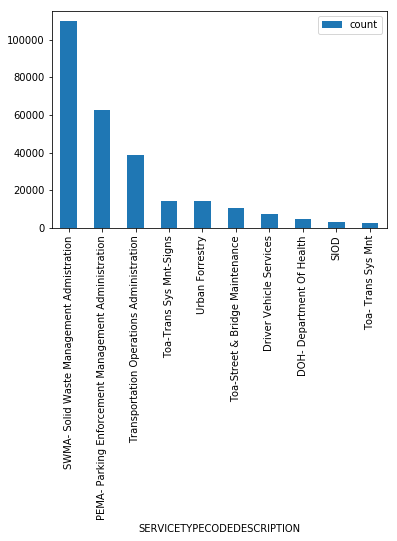

In [53]:
test = data.select("ORGANIZATIONACRONYM","SERVICETYPECODEDESCRIPTION")\
    .groupBy("SERVICETYPECODEDESCRIPTION") \
    .count() \
    .orderBy("count", ascending = False)\
    .limit(10)
ptest = test.toPandas()
ptest.plot(kind='bar',x='SERVICETYPECODEDESCRIPTION',y='count')

###### 1.2 Among the service type of SWMA, what is the most frequently resident requests in 2017?
In the service type of Solid Waste Management Administration, Bulk Collection has been requested for more than 40,000 times in 2017, almost half of the SWMA. 

In [54]:
data.filter("SERVICETYPECODEDESCRIPTION = 'SWMA- Solid Waste Management Admistration'")\
    .groupBy('SERVICECODEDESCRIPTION') \
    .count() \
    .orderBy("count", ascending = False)\
    .show(10)

+----------------------+-----+
|SERVICECODEDESCRIPTION|count|
+----------------------+-----+
|       Bulk Collection|45670|
|  Sanitation Enforc...| 8668|
|  Trash Collection ...| 8353|
|        Alley Cleaning| 7855|
|       Street Cleaning| 5437|
|       Illegal Dumping| 5375|
|  Recycling Collect...| 5324|
|      Graffiti Removal| 4698|
|  Dead Animal Colle...| 2662|
|  Trash Cart - Deli...| 2432|
+----------------------+-----+
only showing top 10 rows



###### 1.3 Regardless of service types, what is the most frequently resident requests in 2017?
If we look at specific service request regardless of service type, we will find out the top 3 frequent service requests are Bulk Collection, Parking Enforcement and Parking Meter Repair.  Besides, Department of Transportation and Department of Public Works are responsible for all the top 10 service requests.

In [55]:
data.select("SERVICECODEDESCRIPTION", "ORGANIZATIONACRONYM")\
    .groupBy('SERVICECODEDESCRIPTION','ORGANIZATIONACRONYM')\
    .count() \
    .orderBy("count", ascending = False) \
    .show(10)

+----------------------+-------------------+-----+
|SERVICECODEDESCRIPTION|ORGANIZATIONACRONYM|count|
+----------------------+-------------------+-----+
|       Bulk Collection|                DPW|45670|
|   Parking Enforcement|                DPW|33735|
|  Parking Meter Repair|               DDOT|27006|
|         Roadway Signs|               DDOT|14158|
|  Emergency No-Park...|                DPW|12481|
|  Streetlight Repai...|               DDOT|11013|
|  Sanitation Enforc...|                DPW| 8668|
|  Trash Collection ...|                DPW| 8353|
|        Alley Cleaning|                DPW| 7855|
|  Residential Parki...|                DPW| 7697|
+----------------------+-------------------+-----+
only showing top 10 rows



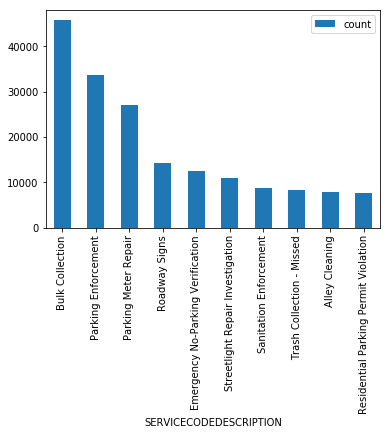

In [56]:
std = data.select("SERVICECODEDESCRIPTION")\
    .groupBy('SERVICECODEDESCRIPTION')\
    .count() \
    .orderBy("count", ascending = False) \
    .limit(10)
pstd = std.toPandas()
pstd.plot(kind='bar',x='SERVICECODEDESCRIPTION',y='count')

### Analysis 2 
###### How many services are completed and how many services are not ?
Now, let’s look at our completion time statistics. This table is basically giving us an idea of the average timeframe for a service request to be completed. It can be seen that 248512 out of 279513 service requests were completed. The mean and standard deviation of along with the minimum and maximum completion time are generated in seconds in the table below. 


In [57]:
data.describe('COMPLETIONTIME').show()

+-------+------------------+
|summary|    COMPLETIONTIME|
+-------+------------------+
|  count|            248512|
|   mean| 795533.7924647502|
| stddev|1982742.8942374259|
|    min|               0.0|
|    max|       2.7878904E7|
+-------+------------------+



To make sure that our information about the completed service requests are accurate we ran a code to group the service requests by their status, whether they are closed or open, and give us a count of each group.  This table verifies that from 279513 service requests 248512 are completed and 31001 are still open.


In [58]:
data.groupBy("STATUS_CODE")\
    .count()\
    .show()

+-----------+------+
|STATUS_CODE| count|
+-----------+------+
|     CLOSED|248512|
|       OPEN| 31001|
+-----------+------+



Just to check and see if excluding the open requests will result in different Completion Time distribution or not, we ran a code for describing completion time excluding the open requests.
Comparing the two tables, we see that the two tables are identical, meaning that even without excluding open requests the Jupiter only calculates the distribution for the completion cells that have a numeric value.


In [59]:
data.filter("STATUS_CODE = 'CLOSED'")\
    .describe('COMPLETIONTIME').show()

+-------+------------------+
|summary|    COMPLETIONTIME|
+-------+------------------+
|  count|            248512|
|   mean| 795533.7924647502|
| stddev|1982742.8942374259|
|    min|               0.0|
|    max|       2.7878904E7|
+-------+------------------+



### Analysis 3
###### How many services are past due and how many services are finished earlier?
Now let’s see how service requests are being completed in relation to due date time frames. We would like to get a count of the service requests that are being completed after the due date is passed. Therefore, in the code below we set a condition that SECONDSTILLDUEDATE < 0.
We added the column SECONDSTILLDUEDATE in Part II. The values in this column are calculated by due date – completion date. Therefore, if this value is less than zero, it can be concluded that completion date fell into a later date than the due date. From the code below, we understand that 24166 service requests were completed after the due date was passed.


In [60]:
data.describe('SECONDSTILLDUEDATE').show()

+-------+------------------+
|summary|SECONDSTILLDUEDATE|
+-------+------------------+
|  count|            248505|
|   mean|1747475.8584173357|
| stddev| 8158286.395024692|
|    min|      -2.7042373E7|
|    max|       9.0966412E7|
+-------+------------------+



#### Requests which have been finished in time.

In [61]:
data.filter("SECONDSTILLDUEDATE > 0") \
    .orderBy("SECONDSTILLDUEDATE") \
    .count()

224339

#### Requests which have not been finished before the due date.

In [62]:
data.filter("SECONDSTILLDUEDATE < 0") \
    .orderBy("SECONDSTILLDUEDATE") \
    .count()

24166

### Analysis 4
###### 4.1 What is the relationship between completion time and Overdue requests?
Now, we would like to grasp an understanding of the distributions of the completion time of overdue requests. As it was expected, the mean and min of these service requests are bigger than that of overall completion time request.

In [63]:
data.filter("SECONDSTILLDUEDATE < 0") \
    .orderBy("SECONDSTILLDUEDATE") \
    .describe("COMPLETIONTIME")\
    .show()

+-------+------------------+
|summary|    COMPLETIONTIME|
+-------+------------------+
|  count|             24166|
|   mean| 2649971.563560374|
| stddev|3687357.7185807433|
|    min|30782.000000000004|
|    max|       2.7215132E7|
+-------+------------------+



###### 4.2 Which service requests are fell behind the schedule?
From the table generated below, it can be perceived that traffic lights, street light repairs, community events and tree inspections are the service requests that fell behind the schedule with widest distance.

In [64]:
data.filter("SECONDSTILLDUEDATE < 0") \
    .select("SERVICECODEDESCRIPTION","SECONDSTILLDUEDATE")\
    .orderBy("SECONDSTILLDUEDATE")\
    .show()

+----------------------+------------------+
|SERVICECODEDESCRIPTION|SECONDSTILLDUEDATE|
+----------------------+------------------+
|  Traffic Signal Issue|      -2.7042373E7|
|  FEMS - Community ...|       -2.649993E7|
|  Traffic Signal Issue|      -2.5821198E7|
|  FEMS - Community ...|      -2.5488794E7|
|  FEMS - Community ...|      -2.5294774E7|
|  Streetlight Repai...|      -2.2989071E7|
|  Traffic Signal Issue|      -2.1760689E7|
|  Streetlight Repai...|      -2.1588487E7|
|  Streetlight Repai...|      -2.1404895E7|
|  Traffic Signal Issue|       -2.118211E7|
|  Traffic Signal Issue|      -2.1164167E7|
|  Traffic Signal Issue|      -2.1140768E7|
|  FEMS - Community ...|      -2.0975608E7|
|  Traffic Signal Issue|      -2.0642111E7|
|  Streetlight Repai...|      -2.0540306E7|
|  Streetlight Repai...|      -2.0278693E7|
|  Traffic Signal Issue|      -2.0108652E7|
|  Streetlight Repai...|      -1.9967795E7|
|       Tree Inspection|      -1.9937575E7|
|  Traffic Signal Issue|       -

###### 4.3 What types of service requests are more likely to be completed after the due date is passed?
Now, we are curious to see which types of service requests are more likely to be completed after the due date is passed. We commanded Jupiter to find service code descriptions for past due completed service requests count them, group them by service code description and sort them in a descending order. This way we will be able to see which services showed most incidents of being completed after the due date is passed. As it can be seen from the following bar chart, the parking meter repair, traffic signal issues and potholes are the top three service requests that have been completed after the due date was passed.

In [65]:
sqlc.sql("SELECT SERVICECODEDESCRIPTION, COUNT(*) AS count\
          FROM data\
          WHERE SECONDSTILLDUEDATE <0\
          GROUP BY SERVICECODEDESCRIPTION\
          ORDER BY count DESC")\
    .show()

+----------------------+-----+
|SERVICECODEDESCRIPTION|count|
+----------------------+-----+
|  Parking Meter Repair| 4450|
|  Traffic Signal Issue| 2592|
|               Pothole| 2202|
|  Rodent Inspection...| 2017|
|       Bulk Collection| 1908|
|  Abandoned Vehicle...| 1280|
|  Streetlight Repai...|  942|
|      Graffiti Removal|  894|
|  Trash Collection ...|  854|
|   Parking Enforcement|  812|
|        Alley Cleaning|  688|
|  Sidewalk Shovelin...|  643|
|  Recycling Collect...|  489|
|       Street Cleaning|  393|
|         Roadway Signs|  327|
|  Emergency No-Park...|  303|
|  Grass and Weeds M...|  292|
|  Dead Animal Colle...|  270|
|  DMV - Drivers Lic...|  261|
|  How Is My Driving...|  238|
+----------------------+-----+
only showing top 20 rows



In [66]:
df = sqlc.sql("SELECT SERVICECODEDESCRIPTION, COUNT(*) AS count\
          FROM data\
          WHERE SECONDSTILLDUEDATE <0\
          GROUP BY SERVICECODEDESCRIPTION\
          ORDER BY count DESC\
          LIMIT 10")

In [67]:
pdf = df.toPandas()

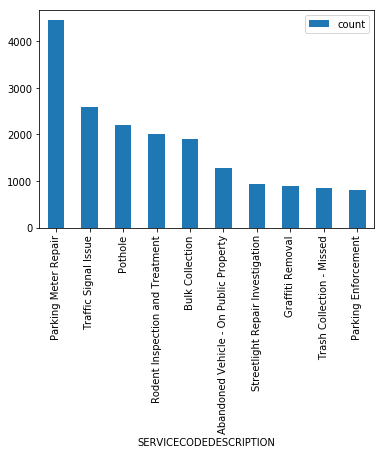

In [68]:
pdf.plot(kind='bar',x='SERVICECODEDESCRIPTION',y='count')

### Analysis 5 
###### 5.1 Which zip codes had placed most service requests?
It is also interesting to know which zip codes had placed most service requests. To find this information, we ran a code to show all zip codes, count them to show how many times each zip code appeared in our service requests and sort them in a descending order. It can be seen from the table below that zip code 20002 appeared the most in our service requests.

In [69]:
sqlc.sql("SELECT ZIPCODE, COUNT(*) AS count\
          FROM data\
          GROUP BY ZIPCODE\
          ORDER BY count DESC")\
    .show()

+-------+-----+
|ZIPCODE|count|
+-------+-----+
|20002.0|34434|
|20011.0|30075|
|20001.0|24063|
|20019.0|23133|
|20009.0|19900|
|20020.0|17130|
|20003.0|13575|
|20010.0|12891|
|20007.0|12009|
|20016.0|11009|
|20032.0| 9790|
|20018.0| 9248|
|20008.0| 8290|
|20017.0| 7786|
|20015.0| 7322|
|20012.0| 7133|
|20005.0| 6252|
|20024.0| 5757|
|20036.0| 5192|
|20037.0| 5151|
+-------+-----+
only showing top 20 rows



###### 5.2 What types of the service are requested most frequently in the zip code 20002? 
To find this information, we selected zip code 20002, count type of service requests and sort them in a descending order. It can be seen from the table below that Bulk Collection, Parking Enforcement and Residential Parking are the top 3 service requests at zip code 20002.

In [70]:
sqlc.sql("SELECT SERVICECODEDESCRIPTION, COUNT(*) AS count\
          FROM data\
          WHERE ZIPCODE = 20002\
          GROUP BY SERVICECODEDESCRIPTION\
          ORDER BY count DESC")\
    .show()

+----------------------+-----+
|SERVICECODEDESCRIPTION|count|
+----------------------+-----+
|       Bulk Collection| 5990|
|   Parking Enforcement| 4477|
|  Residential Parki...| 1889|
|  Sanitation Enforc...| 1681|
|        Alley Cleaning| 1624|
|  Emergency No-Park...| 1565|
|  Trash Collection ...| 1263|
|       Illegal Dumping| 1205|
|  Streetlight Repai...| 1115|
|  Parking Meter Repair| 1046|
|         Roadway Signs| 1044|
|       Street Cleaning|  970|
|  Rodent Inspection...|  725|
|  Recycling Collect...|  670|
|  Abandoned Vehicle...|  597|
|       Tree Inspection|  549|
|  Out of State Park...|  530|
|               Pothole|  527|
|       Sidewalk Repair|  458|
|  Trash Cart - Deli...|  419|
+----------------------+-----+
only showing top 20 rows



### Analysis 6
###### Which months the service requests went to the peak level?
Now, we would like to see in which months the service requests peak. Our analysis would have been more comprehensive if we had information on the December’s service requests but since we are still in year 2017 and we don’t have any information about December service requests yet, we conduct our analysis on the first eleven months of the year.  

Using sql we count the number of service requests in each month and group the result by month. Then we sort the data based on the month that the service request was placed. After transforming our sql data into data frame. We built a line chart as we did in the previous section.  

From the below line chart we notice that month 6, 7 and 8 are the top 3 months.

In [71]:
sqlc.sql("SELECT SEVICEORDERMONTH, COUNT(*) AS count\
          FROM data\
          GROUP BY SEVICEORDERMONTH\
          ORDER BY SEVICEORDERMONTH")\
    .show()

+----------------+-----+
|SEVICEORDERMONTH|count|
+----------------+-----+
|               1|22765|
|               2|20950|
|               3|24248|
|               4|24757|
|               5|26998|
|               6|28962|
|               7|29337|
|               8|30567|
|               9|27569|
|              10|26885|
|              11|16475|
+----------------+-----+



In [72]:
df = sqlc.sql("SELECT SEVICEORDERMONTH, COUNT(*) AS count\
          FROM data\
          GROUP BY SEVICEORDERMONTH\
          ORDER BY SEVICEORDERMONTH")

In [73]:
pdf = df.toPandas()

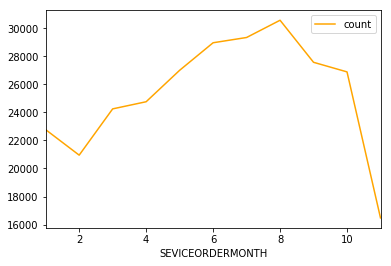

In [74]:
pdf.plot(kind='line',x='SEVICEORDERMONTH',y='count',color='orange')

### Analysis 7
###### 7.1 which ward the service requests went to the peak level
Let's look at how the service requests differs as far as quantity in each ward. From the result in the Bar Chart below, we notice that ward 2 and ward 6 are the top 2 wards to make the service requests. Here is the image to show how DC divided the place into 8 wards. 

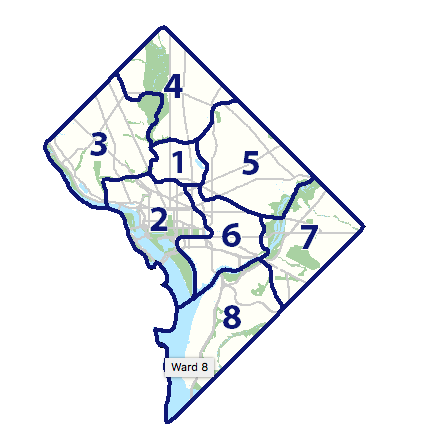

In [75]:
from IPython.display import Image
Image(filename='output1.png')

In [76]:
sqlc.sql("SELECT WARD, COUNT(*) AS count\
          FROM data\
          WHERE WARD IS NOT NULL\
          GROUP BY WARD\
          ORDER BY WARD")\
    .show()

+----+-----+
|WARD|count|
+----+-----+
| 1.0|32096|
| 2.0|44831|
| 3.0|26645|
| 4.0|38268|
| 5.0|38384|
| 6.0|45012|
| 7.0|30524|
| 8.0|21241|
+----+-----+



In [77]:
df = sqlc.sql("SELECT WARD, COUNT(*) AS count\
          FROM data\
          WHERE WARD IS NOT NULL\
          GROUP BY WARD\
          ORDER BY WARD")

In [78]:
pdf = df.toPandas()

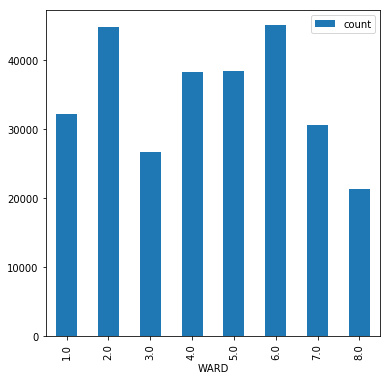

In [79]:
pdf.plot(x='WARD', y='count', kind='bar', figsize=(6,6))

###### 7.2. Use the bar chart to show the relationship between number of service requests in month and each ward. 
Next, we will go one step deeper to see what is the service request trend in each of DC’s 8 different wards in each of the months in year 2017.  So, in the code below, we are commanding Jupiter to grab the months, on which service requests are placed, the ward, for which a service request was placed and the sum of service call for these groups. Then we sorted the data first by the month, second by the ward and third the sum in a descending order.


In [80]:
sqlc.sql("SELECT SEVICEORDERMONTH, WARD, SUM(SERVICECALLCOUNT) AS sum\
          FROM data\
          WHERE WARD IS NOT NULL\
          AND SEVICEORDERMONTH IS NOT NULL\
          GROUP BY SEVICEORDERMONTH, WARD\
          ORDER BY SEVICEORDERMONTH, WARD, sum DESC")\
    .show(20)

+----------------+----+----+
|SEVICEORDERMONTH|WARD| sum|
+----------------+----+----+
|               1| 1.0|2483|
|               1| 2.0|3883|
|               1| 3.0|2398|
|               1| 4.0|3029|
|               1| 5.0|3247|
|               1| 6.0|3585|
|               1| 7.0|2362|
|               1| 8.0|1603|
|               2| 1.0|2306|
|               2| 2.0|3592|
|               2| 3.0|2046|
|               2| 4.0|2549|
|               2| 5.0|2979|
|               2| 6.0|3231|
|               2| 7.0|2273|
|               2| 8.0|1840|
|               3| 1.0|3016|
|               3| 2.0|3882|
|               3| 3.0|2147|
|               3| 4.0|2912|
+----------------+----+----+
only showing top 20 rows



As usual we are transforming our data to data frame and read it to Pandas. 


In [81]:
df = sqlc.sql("SELECT SEVICEORDERMONTH, WARD, SUM(SERVICECALLCOUNT) AS sum\
          FROM data\
          WHERE WARD IS NOT NULL\
          AND SEVICEORDERMONTH IS NOT NULL\
          GROUP BY SEVICEORDERMONTH, WARD\
          ORDER BY SEVICEORDERMONTH, WARD, sum DESC")

In [82]:
pdf = df.toPandas()

Since in the table above, ward values appeared as floats, we decided to set wards as integer to look prettier in our tables.


In [83]:
pdf["WARD"] = pdf["WARD"].astype('int64')

In [84]:
pivot_pdf = pdf.pivot(index='SEVICEORDERMONTH',columns='WARD', values='sum')

Since it is a three-way relation pivot table appears to be most efficient way of generating our results. Let’s look at our pivot table. 


In [85]:
pivot_pdf

WARD,1,2,3,4,5,6,7,8
SEVICEORDERMONTH,,,,,,,,
1,2483,3883,2398,3029,3247,3585,2362,1603
2,2306,3592,2046,2549,2979,3231,2273,1840
3,3016,3882,2147,2912,3415,4046,2737,1900
4,2700,3724,2180,3457,3351,4296,2910,1903
5,3094,4155,2799,3428,3659,4571,3111,1934
6,3149,4238,2423,4860,4084,4722,3146,2087
7,3352,4639,2843,3857,4237,4551,3218,2364
8,3588,4508,3076,4337,4528,4773,3367,2085
9,3503,4435,2467,4157,3428,4579,2816,1907


Too many numbers, right?

A visualized version of this data should be more efficient. Using the code below we created a bar chart which not only shows the trend of service requests in each month, but also identifies which portion of these service requests belongs to each ward. Did you notice the significantly lower number of requests in month 11? That is most probably because this dataset was generated in month 11 and not all the service requests in this month were captured.


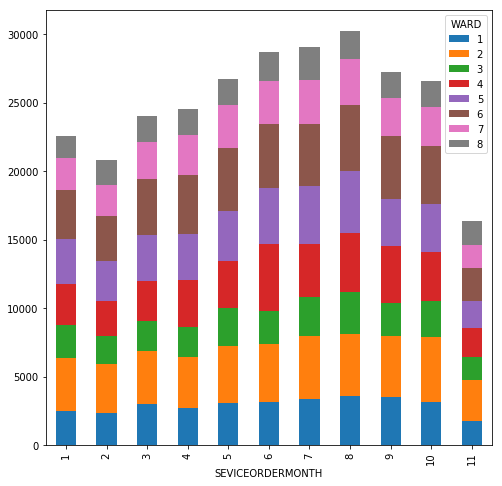

In [86]:
pivot_pdf.loc[:,[1,2,3,4,5,6,7,8]].plot.bar(stacked=True, figsize=(8,8))

### Bonus - Augment
Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other sources. Identify at least one additional data source that can complement your analysis. Pull this additional data into your chosen environment and explore at least one more theme you are able to further analyze that depends upon a combination of data from both sources.

###### Answer:
Now we feel very comfortable with our understanding of our service request behaviors in our current dataset. We think that the next step is to implement DC’s crimes dataset and see if there is any relationship between the areas for which the crime rates are high and areas for which service requests are placed most often.



###### 1. We also wrangling our data. Here is our recipe.  

```
drop col: X
drop col: Y
drop col: CCN
drop col: BLOCK
drop col: XBLOCK
drop col: YBLOCK
drop col: ANC
drop col: NEIGHBORHOOD_CLUSTER
drop col: BLOCK_GROUP
drop col: CENSUS_TRACT
drop col: VOTING_PRECINCT
drop col: XCOORD
drop col: YCOORD
derive value: dateformat(REPORT_DAT, 'yyyy-MM-dd HH:mm:ss') as: 'dateformat_REPORT_DAT'
rename col: dateformat_REPORT_DAT to: 'Report_date'
drop col: REPORT_DAT
drop col: START_DATE
derive value: dateformat(END_DATE, 'yyyy-MM-dd HH:mm:ss') as: 'End_date_correct'
drop col: END_DATE
```

###### 2. Explore our data

In [87]:
!xsv headers Crime_Incidents_in_2017.csv

1   Report_date
2   SHIFT
3   METHOD
4   OFFENSE
5   WARD
6   DISTRICT
7   PSA
8   LATITUDE
9   LONGITUDE
10  BID
11  End_date_correct
12  OBJECTID


In [88]:
!xsv count Crime_Incidents_in_2017.csv

31091


In [89]:
import numpy as np
import pandas as pd
Crime = pd.read_csv("Crime_Incidents_in_2017.csv")
Crime.head()

,Report_date,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,PSA,LATITUDE,LONGITUDE,BID,End_date_correct,OBJECTID
0,2017-09-01 13:45:31,DAY,OTHERS,THEFT/OTHER,1,3.0,305.0,38.916993,-77.024642,NaN,2017-09-01 01:00:20,96936385
1,2017-09-01 14:32:00,DAY,GUN,ROBBERY,6,5.0,501.0,38.907537,-77.001407,NOMA,2017-09-01 13:15:07,96936386
2,2017-09-01 15:14:26,EVENING,OTHERS,THEFT/OTHER,8,7.0,707.0,38.844109,-76.998191,NaN,2017-09-01 15:14:26,96936387
3,2017-09-01 16:23:22,EVENING,OTHERS,THEFT/OTHER,5,5.0,504.0,38.924967,-76.984674,NaN,2017-09-01 16:23:18,96936388
4,2017-09-02 00:46:40,MIDNIGHT,OTHERS,THEFT/OTHER,7,6.0,603.0,38.893557,-76.956151,NaN,2017-09-01 15:45:05,96936389


In [90]:
Crime.dtypes

Report_date          object
SHIFT                object
METHOD               object
OFFENSE              object
WARD                  int64
DISTRICT            float64
PSA                 float64
LATITUDE            float64
LONGITUDE           float64
BID                  object
End_date_correct     object
OBJECTID              int64
dtype: object

In [91]:
Crime['Report_date']= pd.to_datetime(Crime['Report_date'])

In [92]:
Crime.dtypes

Report_date         datetime64[ns]
SHIFT                       object
METHOD                      object
OFFENSE                     object
WARD                         int64
DISTRICT                   float64
PSA                        float64
LATITUDE                   float64
LONGITUDE                  float64
BID                         object
End_date_correct            object
OBJECTID                     int64
dtype: object

In [93]:
import datetime as dt
Crime['Report_month']= Crime['Report_date'].dt.month

In [94]:
Crime.head(6)

,Report_date,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,PSA,LATITUDE,LONGITUDE,BID,End_date_correct,OBJECTID,Report_month
0,2017-09-01 13:45:31,DAY,OTHERS,THEFT/OTHER,1,3.0,305.0,38.916993,-77.024642,NaN,2017-09-01 01:00:20,96936385,9
1,2017-09-01 14:32:00,DAY,GUN,ROBBERY,6,5.0,501.0,38.907537,-77.001407,NOMA,2017-09-01 13:15:07,96936386,9
2,2017-09-01 15:14:26,EVENING,OTHERS,THEFT/OTHER,8,7.0,707.0,38.844109,-76.998191,NaN,2017-09-01 15:14:26,96936387,9
3,2017-09-01 16:23:22,EVENING,OTHERS,THEFT/OTHER,5,5.0,504.0,38.924967,-76.984674,NaN,2017-09-01 16:23:18,96936388,9
4,2017-09-02 00:46:40,MIDNIGHT,OTHERS,THEFT/OTHER,7,6.0,603.0,38.893557,-76.956151,NaN,2017-09-01 15:45:05,96936389,9
5,2017-09-01 19:27:05,EVENING,KNIFE,ASSAULT W/DANGEROUS WEAPON,2,2.0,206.0,38.916030,-77.069392,NaN,2017-09-01 17:00:47,96936390,9


In [95]:
Crime.to_csv("crime.csv", index=False)

In [96]:
crime = sqlc.read.csv("crime.csv", header=True, inferSchema=True)

In [97]:
crime.createOrReplaceTempView("crime")

In [98]:
crime.count()

31091

In [99]:
crime.show(2)

+-------------------+-----+------+-----------+----+--------+-----+----------------+-----------------+----+-------------------+--------+------------+
|        Report_date|SHIFT|METHOD|    OFFENSE|WARD|DISTRICT|  PSA|        LATITUDE|        LONGITUDE| BID|   End_date_correct|OBJECTID|Report_month|
+-------------------+-----+------+-----------+----+--------+-----+----------------+-----------------+----+-------------------+--------+------------+
|2017-09-01 13:45:31|  DAY|OTHERS|THEFT/OTHER|   1|     3.0|305.0|38.9169934322698| -77.024641618561|null|2017-09-01 01:00:20|96936385|           9|
|2017-09-01 14:32:00|  DAY|   GUN|    ROBBERY|   6|     5.0|501.0| 38.907537266621|-77.0014065881474|NOMA|2017-09-01 13:15:07|96936386|           9|
+-------------------+-----+------+-----------+----+--------+-----+----------------+-----------------+----+-------------------+--------+------------+
only showing top 2 rows



### Analysis 
###### 1. Is there any relationship between number of crime and number of service request based on different month?

In [100]:
df1 = sqlc.sql("SELECT report_month, COUNT(*) AS crime_count\
          FROM crime\
          GROUP BY Report_month\
          ORDER BY Report_month")

In [101]:
df1 = df1.toPandas()
df1

,report_month,crime_count
0,1,3019
1,2,2416
2,3,2324
3,4,2680
4,5,3077
5,6,2862
6,7,2876
7,8,2843
8,9,2811
9,10,2972


In [102]:
df2= sqlc.sql("SELECT SEVICEORDERMONTH, COUNT(*) AS service_count\
          FROM data\
          GROUP BY SEVICEORDERMONTH\
          ORDER BY SEVICEORDERMONTH")

In [103]:
df2=df2.toPandas()
df2

,SEVICEORDERMONTH,service_count
0,1,22765
1,2,20950
2,3,24248
3,4,24757
4,5,26998
5,6,28962
6,7,29337
7,8,30567
8,9,27569
9,10,26885


In [104]:
a = pd.concat([df1,df2],axis=1).drop(['SEVICEORDERMONTH'],axis=1)
a = a[:11]
a

,report_month,crime_count,service_count
0,1,3019,22765.0
1,2,2416,20950.0
2,3,2324,24248.0
3,4,2680,24757.0
4,5,3077,26998.0
5,6,2862,28962.0
6,7,2876,29337.0
7,8,2843,30567.0
8,9,2811,27569.0
9,10,2972,26885.0


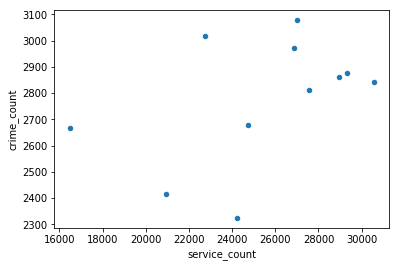

In [105]:
a.plot.scatter(x='service_count', y='crime_count')

From the above picture, based on month, we notice that the service request and crime are not related to each other.

###### 2. Is there any relationship between number of crime and number of service request based on 8 wards?

In [106]:
df3 = sqlc.sql("SELECT WARD, COUNT(*) AS crime_count\
          FROM crime\
          GROUP BY WARD\
          ORDER BY WARD")

In [107]:
df3 = df3.toPandas()
df3

,WARD,crime_count
0,1,4297
1,2,5608
2,3,1486
3,4,2699
4,5,4457
5,6,5233
6,7,4069
7,8,3242


In [108]:
df4 = sqlc.sql("SELECT WARD, COUNT(*) AS service_count\
          FROM data\
          WHERE WARD IS NOT NULL\
          GROUP BY WARD\
          ORDER BY WARD")

In [109]:
df4 = df4.toPandas()
df4

,WARD,service_count
0,1.0,32096
1,2.0,44831
2,3.0,26645
3,4.0,38268
4,5.0,38384
5,6.0,45012
6,7.0,30524
7,8.0,21241


In [110]:
b = pd.concat([df3,df4],axis=1)
b = b[:11]
b

,WARD,crime_count,WARD,service_count
0,1,4297,1.0,32096
1,2,5608,2.0,44831
2,3,1486,3.0,26645
3,4,2699,4.0,38268
4,5,4457,5.0,38384
5,6,5233,6.0,45012
6,7,4069,7.0,30524
7,8,3242,8.0,21241


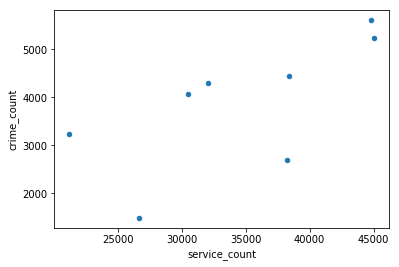

In [111]:
b.plot.scatter(x='service_count', y='crime_count')

From the above picture, based on the 8 wards, we notice that the service request and crime has the relationship: as the service request increases, the crime count also increase. The top 2 service request wards are number 2 and 6, the top 2 crime number are also wards number 2 and 6. Notice that there are two outliers. 